# Dimensionality reduction

## Why reduce dimensionality?
Your dataset will:
- be less complex
- require less disk space
- require less computation time
- have lower chance of model overfitting

## Feature selection vs feature extraction
- Feature selection is dropping non-necessary columns
- Feature extraction is combining features

## Visually detecting redundant features

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='Gender', diag_kind='hist')

## T-sne 
(visualize high dimensional data in clusters - [keeps similar data points together, and dissimilar data points apart])

In [ ]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df)
print(tsne_features.shape)

# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

## The curse of dimensionality 
ML models tend to overfit high dimensional datasets
- Always start by removing features with:
    - Low variance
    - Lots of NaN values
    - Highly correlated 

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as cm

df = pd.read_csv('data/ansur/ANSUR II FEMALE Public.csv')
df = df.select_dtypes(exclude='object')
df = df.iloc[:, :6]

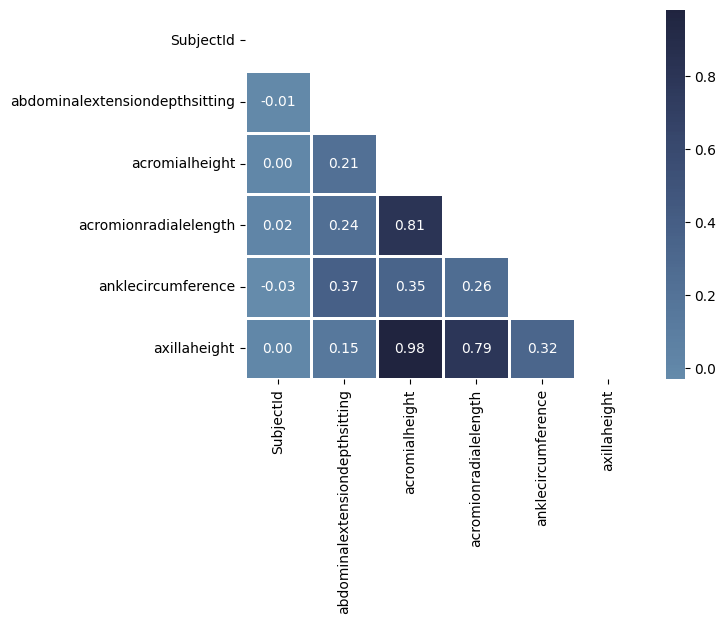

In [28]:
# Create the correlation matrix
corr = df.corr()

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [12]:
corr

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
SubjectId,1.000000,-0.013789,0.004100,0.022717,-0.031470,0.004606,0.000897,0.033391,-0.029601,-0.010903,...,-0.002984,-0.009188,-0.010213,-0.010356,0.016271,0.008103,0.028523,-0.018173,0.008401,-0.014049
abdominalextensiondepthsitting,-0.013789,1.000000,0.214947,0.237222,0.372719,0.151886,0.316927,0.241917,0.225261,0.729729,...,0.504657,0.017956,0.791290,0.474677,0.205898,0.063056,-0.000055,0.293228,0.170861,0.767667
acromialheight,0.004100,0.214947,1.000000,0.811059,0.350197,0.981581,0.468676,0.676899,0.511699,0.278318,...,0.432915,0.907594,0.556479,0.531893,0.888409,0.031315,-0.195841,0.039226,0.896396,0.553647
acromionradialelength,0.022717,0.237222,0.811059,1.000000,0.259060,0.791981,0.398971,0.616667,0.472225,0.276870,...,0.321334,0.787148,0.510630,0.451131,0.547174,0.053812,-0.161936,0.057805,0.728164,0.505108
anklecircumference,-0.031470,0.372719,0.350197,0.259060,1.000000,0.324684,0.590284,0.413988,0.326983,0.499570,...,0.315741,0.267655,0.608834,0.644307,0.363866,-0.009231,-0.177347,-0.086713,0.345679,0.586055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SubjectNumericRace,0.008103,0.063056,0.031315,0.053812,-0.009231,0.030335,0.011187,0.011540,0.015885,0.021042,...,0.015398,0.041326,0.076842,0.006364,0.027794,1.000000,0.012414,0.068719,0.036638,0.053603
DODRace,0.028523,-0.000055,-0.195841,-0.161936,-0.177347,-0.195123,-0.033147,-0.029885,-0.055075,-0.055157,...,-0.019992,-0.180781,-0.082422,-0.146936,-0.219083,0.012414,1.000000,0.012311,-0.192266,-0.069460
Age,-0.018173,0.293228,0.039226,0.057805,-0.086713,0.000305,0.051034,0.016836,-0.016117,0.268575,...,0.193319,-0.060154,0.220650,0.064341,0.059227,0.068719,0.012311,1.000000,0.017574,0.225218
Heightin,0.008401,0.170861,0.896396,0.728164,0.345679,0.891467,0.462897,0.646926,0.518662,0.243009,...,0.400289,0.837510,0.502772,0.511133,0.789351,0.036638,-0.192266,0.017574,1.000000,0.502403


## Feature importance
Feature importance can also be identified in linear models by inspecting the feature coeffiecients. Or, in Random Forests
- sklearn.feature_selection.RFE removes feature with low coefficients for you.

#### Linear model

In [ ]:
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print(f"{acc:.1%} accuracy on test set.") 

#### Random forest
You'll wrap a Recursive Feature Eliminator around a random forest model to remove features step by step. This method is more conservative compared to selecting features after applying a single importance threshold. Since dropping one feature can influence the relative importances of the others.

In [ ]:
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

## Feature extraction
- Calculation of metrics 

## Principal Component Analysis (PCA)
Awesome! Using just X principal components we can explain more than Y% of the variance in the Z feature dataset.


- Downside: main components are hard to interpret. But you can understand a little bit more by seeing what features afect the components the most. 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()

### Understanding the components

In [ ]:
print(pca.components_)

### Example with pipeline

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

### Inverse transform
Go from components to features

In [ ]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print(f"X_rebuilt has {X_rebuilt.shape[1]} features")